In [111]:

import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

conn_str = (
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=MOHMED;"
    "DATABASE=Northwind;"
    "Trusted_Connection=yes;" 
    
)


conn = pyodbc.connect(conn_str)

cursor = conn.cursor()
cursor.execute("SELECT TABLE_NAME FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_TYPE = 'BASE TABLE'")
tables = cursor.fetchall()


### Monthly Sales

In [112]:
monthly_sales_query = """
SELECT
    YEAR(OrderDate) AS Year,
    MONTH(OrderDate) AS Month,
    SUM(od.Quantity * od.UnitPrice * (1-od.Discount)) AS TotalSales
    FROM Orders o
    JOIN [Order Details] od ON o.OrderID = od.OrderID
    GROUP BY YEAR(OrderDate), MONTH(OrderDate)
    ORDER BY Year, Month """
monthly_sales = pd.read_sql(monthly_sales_query, conn)

C:\Users\hp\AppData\Local\Temp\ipykernel_508\3857557982.py:10: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



### Top Products That Affects the Sales

In [113]:

top_products_query = """
SELECT TOP 5
    p.ProductID,
    p.ProductName,
    SUM(od.Quantity * od.UnitPrice * (1 - od.Discount)) AS TotalSales
FROM Products p
JOIN [Order Details] od ON p.ProductID = od.ProductID
GROUP BY p.ProductID, p.ProductName
ORDER BY TotalSales DESC
"""
top_products = pd.read_sql(top_products_query, conn)

C:\Users\hp\AppData\Local\Temp\ipykernel_508\3269398002.py:11: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



### Top Countries In Sales

In [114]:
sales_by_country_query = """
SELECT
c.Country,
SUM(od.Quantity * od.UnitPrice * (1-od.Discount)) AS TotalSales
FROM Customers c
JOIN Orders o ON c.CustomerID = o.CustomerID
JOIN [Order Details] od ON o.OrderID = od.OrderID
GROUP BY c.Country
ORDER BY TotalSales DESC
"""
sales_by_country = pd.read_sql(sales_by_country_query, conn)

C:\Users\hp\AppData\Local\Temp\ipykernel_508\336739069.py:11: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



### Employee Sales Performance

In [115]:
employee_sales_query = """
SELECT
e.EmployeeID,
e.FirstName + ' ' + e.LastName AS EmployeeName,
SUM(od.Quantity * od.UnitPrice * (1-od.Discount)) AS TotalSales
FROM Employees e
JOIN Orders o ON e.EmployeeID = o.EmployeeID
JOIN [Order Details] od ON o.OrderID = od.OrderID
GROUP BY e.EmployeeID, e.FirstName, e.LastName
ORDER BY TotalSales DESC
"""
employee_sales= pd.read_sql(employee_sales_query, conn)


C:\Users\hp\AppData\Local\Temp\ipykernel_508\2236240360.py:12: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



### Average Order Vlaue by Each Customers

In [116]:
avg_order_value_query = """
SELECT
    c.CustomerID,
    c.CompanyName,
    AVG(od.Quantity * od.UnitPrice * (1 - od.Discount)) AS AvgOrderValue,
    COUNT(DISTINCT o.OrderID) AS OrderCount
FROM Customers c
JOIN Orders o ON c.CustomerID = o.CustomerID
JOIN [Order Details] od ON o.OrderID = od.OrderID
GROUP BY c.CustomerID, c.CompanyName
HAVING COUNT(DISTINCT o.OrderID) > 5
ORDER BY AvgOrderValue DESC
"""
avg_order_value = pd.read_sql(avg_order_value_query, conn)

C:\Users\hp\AppData\Local\Temp\ipykernel_508\2532790557.py:14: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



### Sales of Products Category

In [117]:
category_sales_query = """
SELECT
c.CategoryName,
c.CategoryID,
SUM(od.Quantity * od.UnitPrice * (1-od.Discount)) AS TotalSales
FROM Categories c
JOIN Products p ON c.CategoryID = p.CategoryID
JOIN [Order Details] od ON p.ProductID = od.ProductID
GrOUP BY c.CategoryName, c.CategoryID
ORDER BY TotalSales DESC
"""
category_sales = pd.read_sql(category_sales_query, conn)

C:\Users\hp\AppData\Local\Temp\ipykernel_508\3129260900.py:12: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



### Impact of Discounts on Sales

In [118]:
discount_impact_query="""
SELECT
    CASE 
        WHEN od.Discount = 0 THEN 'No Discount'
        WHEN od.Discount <= 0.1 THEN 'Low Discount (0-10%)'
        WHEN od.Discount <= 0.2 THEN 'Medium Discount (10-20%)'
        ELSE 'High Discount (>20%)'
    END AS DiscountRange,
    SUM(od.Quantity) AS TotalQuantity,
    SUM(od.Quantity * od.UnitPrice * (1 - od.Discount)) AS TotalSales
FROM [Order Details] od
GROUP BY 
    CASE 
        WHEN od.Discount = 0 THEN 'No Discount'
        WHEN od.Discount <= 0.1 THEN 'Low Discount (0-10%)'
        WHEN od.Discount <= 0.2 THEN 'Medium Discount (10-20%)'
        ELSE 'High Discount (>20%)'
    END
ORDER BY TotalSales DESC """
discount_impact = pd.read_sql(discount_impact_query, conn)


C:\Users\hp\AppData\Local\Temp\ipykernel_508\1846176490.py:20: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



### Customer Order Frequency and Sales

In [119]:
customer_frequncy_query="""SELECT 

    c.CustomerID,
    c.CompanyName,
    COUNT(DISTINCT o.OrderID) AS OrderCount,
    SUM(od.Quantity * od.UnitPrice * (1 - od.Discount)) AS TotalSales
FROM Customers c
JOIN Orders o ON c.CustomerID = o.CustomerID
JOIN [Order Details] od ON o.OrderID = od.OrderID
GROUP BY c.CustomerID, c.CompanyName
ORDER BY OrderCount DESC """
customer_frequency = pd.read_sql(customer_frequncy_query, conn)

C:\Users\hp\AppData\Local\Temp\ipykernel_508\3314697858.py:12: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



  ### Best Days Of the Week In Sales

In [120]:
 
day_of_week_query = """
  SELECT 
    DATENAME(WEEKDAY, o.OrderDate) AS DayOfWeek,
    SUM(od.Quantity * od.UnitPrice * (1 - od.Discount)) AS TotalSales
FROM Orders o
JOIN [Order Details] od ON o.OrderID = od.OrderID
GROUP BY DATENAME(WEEKDAY, o.OrderDate), DATEPART(WEEKDAY, o.OrderDate)
ORDER BY DATEPART(WEEKDAY, o.OrderDate);
"""

day_of_week = pd.read_sql(day_of_week_query, conn)


C:\Users\hp\AppData\Local\Temp\ipykernel_508\621268032.py:11: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



### How Much the Suppliers Earn

In [121]:
supplier_profit_query = """SELECT 
        s.SupplierID,
        s.CompanyName,
        SUM(od.Quantity * od.UnitPrice * (1 - od.Discount)) AS TotalSales
    FROM Suppliers s
    JOIN Products p ON s.SupplierID = p.SupplierID
    JOIN [Order Details] od ON p.ProductID = od.ProductID
    GROUP BY s.SupplierID, s.CompanyName
    ORDER BY TotalSales DESC """
supplier_profit = pd.read_sql(supplier_profit_query, conn)


C:\Users\hp\AppData\Local\Temp\ipykernel_508\3167138509.py:10: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



### Top Product Categories by Sales

In [122]:

top_product_by_category_query = """
WITH ProductSales AS (
    SELECT 
        od.ProductID, 
        SUM(od.Quantity * od.UnitPrice * (1 - od.Discount)) AS TotalSales
    FROM [Order Details] od
    GROUP BY od.ProductID
),
ProductCategorySales AS (
    SELECT 
        p.ProductID, 
        p.ProductName, 
        c.CategoryName, 
        ps.TotalSales
    FROM Products p
    JOIN ProductSales ps ON p.ProductID = ps.ProductID
    JOIN Categories c ON p.CategoryID = c.CategoryID
),
RankedProducts AS (
    SELECT 
        pcs.*, 
        RANK() OVER (PARTITION BY pcs.CategoryName ORDER BY pcs.TotalSales DESC) AS SalesRank
    FROM ProductCategorySales pcs
)
SELECT 
    CategoryName, 
    ProductName, 
    TotalSales
FROM RankedProducts
WHERE SalesRank = 1
ORDER BY CategoryName;
"""
top_product_by_category = pd.read_sql(top_product_by_category_query, conn)


C:\Users\hp\AppData\Local\Temp\ipykernel_508\2668151172.py:33: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



### Preproccesing

In [123]:
monthly_sales['MonthYear'] = monthly_sales.apply(lambda x: f"{int(x['Year'])}-{int(x['Month']):02d}", axis=1)
avg_order_value = avg_order_value.sort_values(by='AvgOrderValue', ascending=False).head(10)
customer_frequency = customer_frequency.sort_values(by='OrderCount', ascending=False).head(10)
supplier_profit = supplier_profit.sort_values(by='TotalSales', ascending=False).head(10)

## Visualization

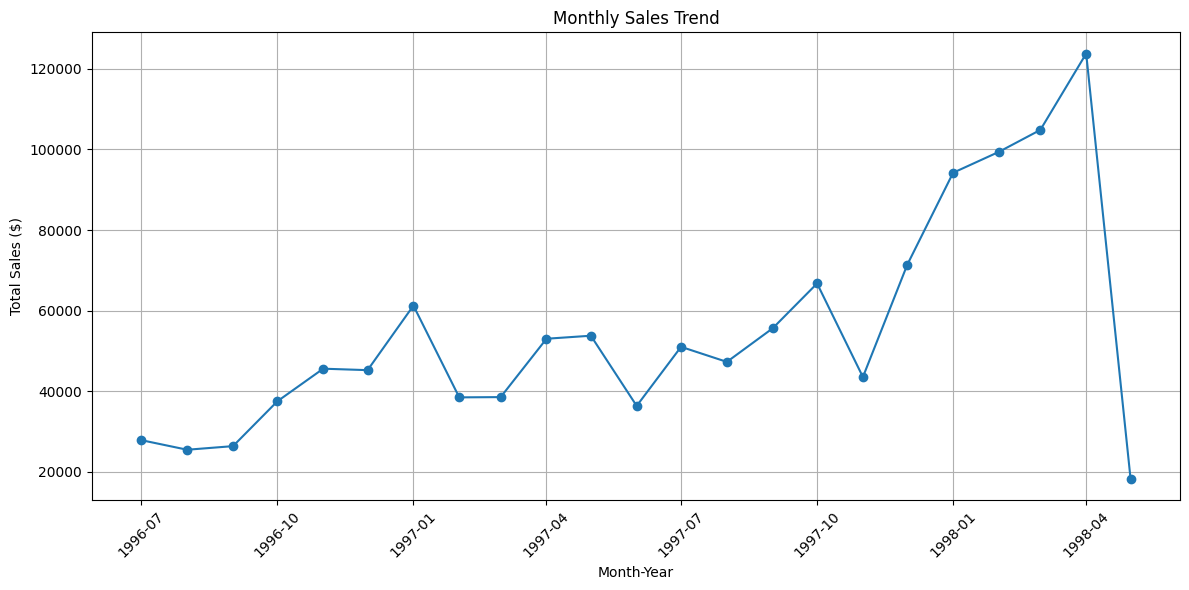

Highest sales month: 1998-04 with $123798.68


In [124]:
monthly_sales['MonthYear'] = pd.to_datetime(monthly_sales['MonthYear'], format='%Y-%m')
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['MonthYear'], monthly_sales['TotalSales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


highest_month = monthly_sales.loc[monthly_sales['TotalSales'].idxmax()]
print(f"Highest sales month: {highest_month['MonthYear'].strftime('%Y-%m')} with ${highest_month['TotalSales']:.2f}")

In [125]:
fig = px.choropleth(
    sales_by_country,
    locations='Country',
    locationmode='country names',
    color='TotalSales',
    color_continuous_scale='Viridis',
    title='Total Sales by Country',
    labels={'TotalSales': 'Total Sales ($)'}
)
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),
    coloraxis_colorbar=dict(title='Total Sales ($)')
)
fig.show()


highest_country = sales_by_country.loc[sales_by_country['TotalSales'].idxmax()]
print(f"Country with highest sales: {highest_country['Country']} with ${highest_country['TotalSales']:.2f}")

Country with highest sales: USA with $245584.61


In [126]:
fig = px.bar(
    top_products,
    x='ProductName',
    y='TotalSales',
    title='Top 5 Products by Sales',
    color='TotalSales',
    color_continuous_scale='Viridis',
    labels={'TotalSales': 'Total Sales ($)'}
)
fig.update_layout(
    xaxis_title='Product Name',
    yaxis_title='Total Sales ($)',
    xaxis_tickangle=45
)
fig.show()


top_product = top_products.loc[top_products['TotalSales'].idxmax()]
print(f"Top product: {top_product['ProductName']} with ${top_product['TotalSales']:.2f}")

Top product: Côte de Blaye with $141396.74


In [127]:
top_employees = employee_sales.head(10)
fig = px.bar(
    top_employees,
    y='EmployeeName',
    x='TotalSales',
    orientation='h',
    title='Top 10 Employees by Sales',
    color='TotalSales',
    color_continuous_scale='Viridis',
    labels={'TotalSales': 'Total Sales ($)'}
)
fig.update_layout(
    yaxis_title='Employee Name',
    xaxis_title='Total Sales ($)',
    yaxis={'categoryorder':'total ascending'}
)
fig.show()


top_employee = top_employees.loc[top_employees['TotalSales'].idxmax()]
print(f"Top employee: {top_employee['EmployeeName']} with ${top_employee['TotalSales']:.2f}")

Top employee: Margaret Peacock with $232890.85


In [128]:
top_customers = avg_order_value.head(10)
fig = px.bar(
    top_customers,
    y='CompanyName',
    x='AvgOrderValue',
    orientation='h',
    title='Top 10 Customers by Average Order Value',
    color='AvgOrderValue',
    color_continuous_scale='Viridis',
    labels={'AvgOrderValue': 'Avg Order Value ($)'}
)
fig.update_layout(
    yaxis_title='Company Name',
    xaxis_title='Average Order Value ($)',
    yaxis={'categoryorder':'total ascending'}
)
fig.show()


top_customer = top_customers.loc[top_customers['AvgOrderValue'].idxmax()]
print(f"Top customer: {top_customer['CompanyName']} with ${top_customer['AvgOrderValue']:.2f} avg order value")

Top customer: QUICK-Stop with $1282.29 avg order value


In [129]:
fig = px.pie(
    category_sales,
    names='CategoryName',
    values='TotalSales',
    title='Sales by Product Category',
    color_discrete_sequence=px.colors.qualitative.Set3
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


top_category = category_sales.loc[category_sales['TotalSales'].idxmax()]
print(f"Top category: {top_category['CategoryName']} with {top_category['TotalSales'] / category_sales['TotalSales'].sum() * 100:.1f}% of total sales")

Top category: Beverages with 21.2% of total sales


In [130]:
discount_melted = discount_impact.melt(id_vars='DiscountRange', value_vars=['TotalQuantity', 'TotalSales'],
                                       var_name='Metric', value_name='Value')
fig = px.bar(
    discount_melted,
    x='DiscountRange',
    y='Value',
    color='Metric',
    barmode='group',
    title='Impact of Discounts on Quantity and Sales',
    labels={'Value': 'Value', 'DiscountRange': 'Discount Range'}
)
fig.update_layout(
    xaxis_title='Discount Range',
    yaxis_title='Value'
)
fig.show()


max_sales_range = discount_impact.loc[discount_impact['TotalSales'].idxmax(), 'DiscountRange']
print(f"Discount range with highest sales: {max_sales_range}")

Discount range with highest sales: No Discount


In [131]:
fig = px.bar(
    top_product_by_category,
    x='CategoryName',
    y='TotalSales',
    color='ProductName',
    title='Top-Selling Product by Category',
    labels={'TotalSales': 'Total Sales ($)', 'CategoryName': 'Category'},
    color_discrete_sequence=px.colors.qualitative.Set3
)
fig.update_layout(
    xaxis_title='Category',
    yaxis_title='Total Sales ($)',
    xaxis_tickangle=45,
    legend_title='Product Name',
    barmode='group'
)
fig.show()


max_sales_row = top_product_by_category.loc[top_product_by_category['TotalSales'].idxmax()]
print(f"Highest sales from a top product: {max_sales_row['ProductName']} in {max_sales_row['CategoryName']} with ${max_sales_row['TotalSales']:.2f}")

Highest sales from a top product: Côte de Blaye in Beverages with $141396.74


In [132]:
fig = px.scatter(
    customer_frequency,
    x='OrderCount',
    y='TotalSales',
    title='Customer Order Frequency vs Total Sales',
    labels={'OrderCount': 'Number of Orders', 'TotalSales': 'Total Sales ($)'},
    color='TotalSales',
    color_continuous_scale='Viridis',
    size='OrderCount'  
)
fig.update_layout(
    xaxis_title='Number of Orders',
    yaxis_title='Total Sales ($)',
    coloraxis_colorbar_title='Total Sales ($)'
)
fig.show()


correlation = customer_frequency['OrderCount'].corr(customer_frequency['TotalSales'])
print(f"Correlation between order count and total sales: {correlation:.2f}")

Correlation between order count and total sales: 0.95


In [133]:
fig = px.bar(
    day_of_week,
    x='DayOfWeek',
    y='TotalSales',
    title='Sales by Day of the Week',
    color='TotalSales',
    color_continuous_scale='Viridis',
    labels={'TotalSales': 'Total Sales ($)'}
)
fig.update_layout(
    xaxis_title='Day of the Week',
    yaxis_title='Total Sales ($)',
    xaxis={'categoryorder':'array', 'categoryarray':['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']}
)
fig.show()


top_day = day_of_week.loc[day_of_week['TotalSales'].idxmax(), 'DayOfWeek']
print(f"Day with highest sales: {top_day}")

Day with highest sales: Friday


In [134]:
top_suppliers = supplier_profit.head(10)
fig = px.treemap(
    top_suppliers,
    path=['CompanyName'],
    values='TotalSales',
    color='TotalSales',
    color_continuous_scale='Viridis',
    title='Top 10 Suppliers by Total Sales'
)
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

top_supplier = top_suppliers.loc[top_suppliers['TotalSales'].idxmax(), 'CompanyName']
print(f"Top supplier: {top_supplier} with ${top_suppliers['TotalSales'].max():.2f}")

Top supplier: Aux joyeux ecclésiastiques with $153691.28


In [135]:
monthly_sales['MonthYear'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(day=1))
monthly_sales = monthly_sales.sort_values('MonthYear')

monthly_sales['Month'] = monthly_sales['MonthYear'].dt.month
monthly_sales['Year'] = monthly_sales['MonthYear'].dt.year
monthly_sales['Lag1'] = monthly_sales['TotalSales'].shift(1)  # Previous month's sales
monthly_sales['Lag2'] = monthly_sales['TotalSales'].shift(2)  # Two months prior


monthly_sales = monthly_sales.dropna()


X = monthly_sales[['Year', 'Month', 'Lag1', 'Lag2']]
y = monthly_sales['TotalSales']


print(monthly_sales[['MonthYear', 'TotalSales', 'Year', 'Month', 'Lag1', 'Lag2']].head())

   MonthYear    TotalSales  Year  Month          Lag1          Lag2
2 1996-09-01  26381.399973  1996      9  25485.274970  27861.894974
3 1996-10-01  37515.725197  1996     10  26381.399973  25485.274970
4 1996-11-01  45600.044844  1996     11  37515.725197  26381.399973
5 1996-12-01  45239.629696  1996     12  45600.044844  37515.725197
6 1997-01-01  61258.070463  1997      1  45239.629696  45600.044844


In [142]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")


print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")
   


R² Score: 0.81
Model Coefficients:
Year: 35813.91
Month: 843.99
Lag1: -0.16
Lag2: -0.13


In [137]:
test_results = X_test.copy()
test_results['Actual'] = y_test
test_results['Predicted'] = y_pred
test_results = test_results.merge(monthly_sales[['MonthYear']], left_index=True, right_index=True)
test_results = test_results.sort_values('MonthYear')


fig = px.line(
    test_results.melt(id_vars='MonthYear', value_vars=['Actual', 'Predicted'], var_name='Type', value_name='Sales'),
    x='MonthYear',
    y='Sales',
    color='Type',
    title='Actual vs Predicted Monthly Sales',
    labels={'Sales': 'Total Sales ($)', 'MonthYear': 'Month-Year'},
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig.update_layout(
    xaxis_title='Month-Year',
    yaxis_title='Total Sales ($)',
    xaxis_tickformat='%Y-%m'
)
fig.show()


avg_error = (test_results['Actual'] - test_results['Predicted']).abs().mean()
print(f"Average prediction error: ${avg_error:.2f}")

Average prediction error: $9015.24


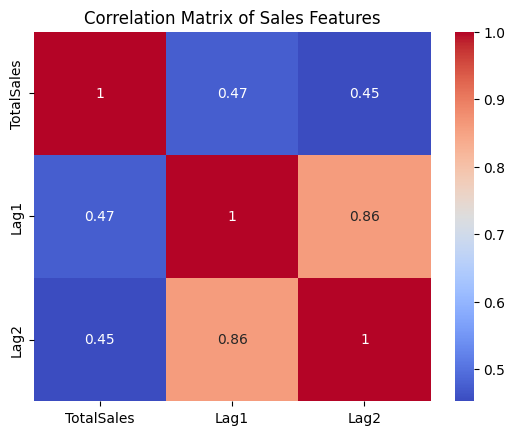

In [144]:
correlation_matrix = monthly_sales[['TotalSales', 'Lag1', 'Lag2']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Sales Features')
plt.show()